# Exercise: Linear Regression
* read in dataset from __`data/skincancer.csv`__
* the dataset contains skin cancer mortality rates from 48 states and Washington D.C.
* the __`Lat`__ column is the latitude at the center of the state
* the __`Mort`__ column is mortality in deaths per 10 million

In [6]:
# Hint: the read_csv function expects comma-separated files
# You can look up the docs on read_csv by typing pd.read_csv? and then hitting Run
import pandas as pd
import matplotlib.pyplot as plt
skin = pd.read_csv('data/skincancer.csv', sep='\t')

# Examine the data

In [4]:
skin.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


# Visualize the data by creating a scatterplot of latitude vs. mortality

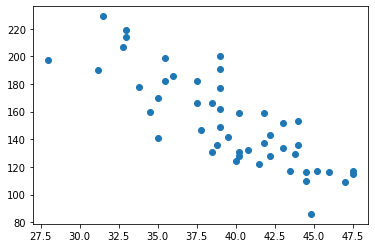

In [9]:
plt.scatter(skin.Lat, skin.Mort); # pass Pandas columns (series) directly to plotter, no need to convert

# Using the demo as starting point, create a linear regression of latitude vs. mortality

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
# Let's make X and y here as per convention (but we don't have to)
X = skin.Lat.values
y = skin.Mort.values

In [47]:
skin.Lat.values

array([33. , 34.5, 35. , 37.5, 39. , 41.8, 39. , 39. , 28. , 33. , 44.5,
       40. , 40.2, 42.2, 38.5, 37.8, 31.2, 45.2, 39. , 42.2, 43.5, 46. ,
       32.8, 38.5, 47. , 41.5, 39. , 43.8, 40.2, 35. , 43. , 35.5, 47.5,
       40.2, 35.5, 44. , 40.8, 41.8, 33.8, 44.8, 36. , 31.5, 39.5, 44. ,
       37.5, 47.5, 38.8, 44.5, 43. ])

In [50]:
y

array([219, 160, 170, 182, 149, 159, 200, 177, 197, 214, 116, 124, 128,
       128, 166, 147, 190, 117, 162, 143, 117, 116, 207, 131, 109, 122,
       191, 129, 159, 141, 152, 199, 115, 131, 182, 136, 132, 137, 178,
        86, 186, 229, 142, 153, 166, 117, 136, 110, 134])

In [51]:
# fit the LinearRegression to our data, thereby creating a model
#model.fit(X, y) # this won't work because we need X to be 2-D
model.fit(X[:, np.newaxis], y) # warning is OK here

LinearRegression()

## Plot the regression line over the scatterplot of the data

In [13]:
# We need to find the lowest and highest X values
# We can eyeball the x-axis and say they are 27.5 and 47.5
# or better, we can compute the min and max of the X values
import numpy as np
xfit = np.linspace(X.min(), X.max(), 2) # create a vector of 2 values, the lowest X and the highest X
xfit

array([28. , 47.5])

In [30]:
yfit = model.predict(xfit[:, np.newaxis])
yfit

array([221.81555019, 105.25165317])

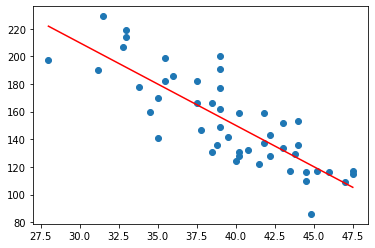

In [32]:
plt.scatter(X, y);
plt.plot(xfit, yfit, color='red');

# What are the values of the coefficient and intercept?

In [34]:
model.coef_, model.intercept_

(array([-5.97763574]), 389.1893510306196)

# Can you explain the relationship?

In [ ]:
# As latitude goes up, risk of death from skin cancer goes down!
# Why? We don't know, but we can conjecture...

# More Linear Regression
* read in dataset from __`data/cars.csv`__
* the dataset contains miles-per-gallon values for various cars


In [37]:
cars = pd.read_csv('data/cars.csv')
cars = cars.rename(columns={'displacement': 'disp',
                     'horsepower': 'power',
                     'cylinders': 'cyl'})
cars.head()

,cyl,disp,power,weight,accel,year,model,mpg
0,8.0,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,15.0
1,8.0,350.0,165.0,3693.0,11.5,70,buick skylark 320,15.0
2,8.0,318.0,150.0,3436.0,11.0,70,plymouth satellite,18.0
3,8.0,304.0,150.0,3433.0,12.0,70,amc rebel sst,16.0
4,8.0,302.0,140.0,3449.0,10.5,70,ford torino,17.0


# Visualize the data by creating scatterplots of displacement, horsepower, and weight vs. mpg

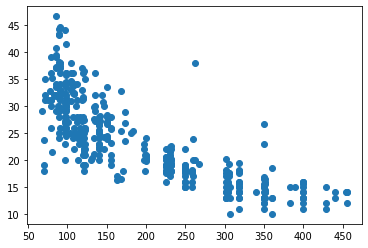

In [38]:
plt.scatter(cars.disp, cars.mpg);

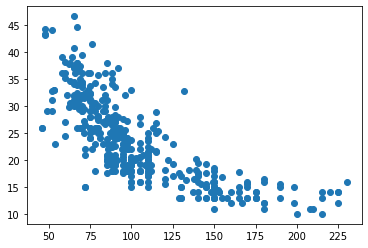

In [39]:
plt.scatter(cars.power, cars.mpg);

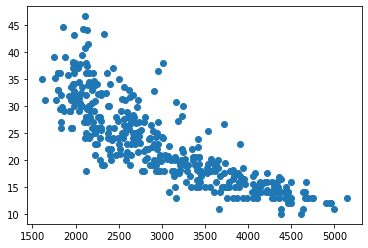

In [40]:
plt.scatter(cars.weight, cars.mpg);

# Create several linear regressions to see how mpg is affected
* displacement vs. mpg
* horsepower vs. mpg
* weight vs. mpg

In [42]:
disp = LinearRegression()
X = cars.disp
y = cars.mpg
disp.fit(X[:, np.newaxis], y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


LinearRegression()

In [44]:
xfit = np.linspace(X.min(), X.max(), 2)
yfit = disp.predict(xfit[:, np.newaxis])

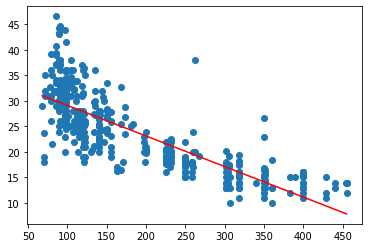

In [45]:
plt.scatter(X, y)
plt.plot(xfit, yfit, color='red');